## Task3:To Explore Unsupervised ML

### Objective:
**From the given 'Iris' dataset,predict the optimum number of clusters and represent it visually.** 

### The K Means Algorithm is:
###### a)Choose a number of clusters “K”
###### b)Randomly assign each point to Cluster
###### c)Until cluster stop changing, repeat the following:
**1)For each cluster, compute the centroid of the cluster by taking the mean vector of the points in the cluster.**
###### 2)Assign each data point to the cluster for which the centroid is closest**

In [1]:
##Import all necessary Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#usml=pd.read_csv(r'C:\Users\Hp\Downloads\Internship\task3\iris.csv')

# Load the iris dataset
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
iris = datasets.load_iris()
target=iris.target
col=['sepal_length','sepal_width','petal_length','petal_width','class']
data = pd.read_csv(url,names = col)
data.head(2)  # See the first 2 rows

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

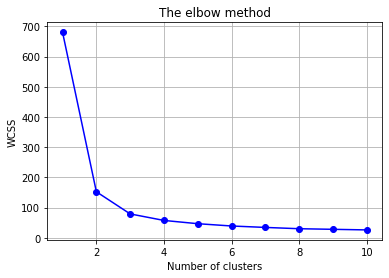

In [3]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,marker='o',color='b')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

**From the above graph, we can see the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**

**From this we choose the number of clusters as '3'.**

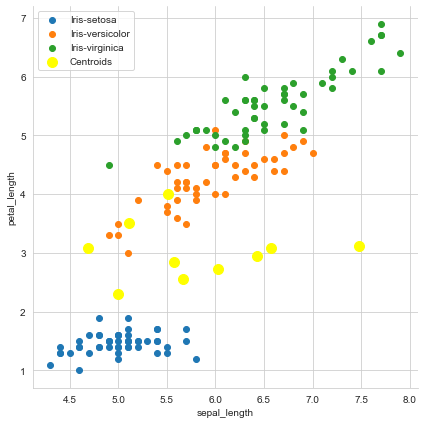

In [4]:
sns.set_style("whitegrid") 
sns.FacetGrid(data, hue ="class",height = 6).map(plt.scatter,'sepal_length','petal_length')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**A centroid is a data point (imaginary or real) at the center of a cluster. Each centroid is an existing data point in the given input data set, picked at random, such that all centroids are unique (that is, for all centroids ci and cj, ci ≠ cj). These centroids are used to train a classifier. The resulting classifier is used to classify (using k = 1) the data and thereby produces an initial randomized set of clusters. Each centroid is thereafter set to the arithmetic mean of the cluster it defines. The process of classification and centroid adjustment is repeated until the values of the centroids stabilize. The final centroids will be used to produce the final classification/clustering of the input data, effectively turning the set of initially anonymous data points into a set of data points, each with a class identity.**

In [5]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Text(0.5, 1.0, 'K means Classifcation')

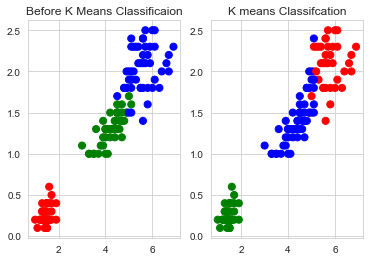

In [6]:
relabel = np.choose(kmeans.labels_,[2,0,1]).astype(np.int64)
colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(x=data["petal_length"] ,y= data["petal_width"],c = colors[target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=data["petal_length"] ,y= data["petal_width"],c = colors[kmeans.labels_],s=50)
plt.title("K means Classifcation")

**We can see that from the above graph the algorithm worked pretty well to make clusters for the above dataset.**

In [7]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(target,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



###### Precision: It measures the relevancy of the model.
##### Recall: Measures the completeness of the model.
###### Highly Accurate Model Results = High Precision + High Recall
###### In our case, average Precision is 91% and the average Recall is 89% of the entire dataset. From these results, we can say that our model is giving highly accurate results.